In [26]:
import pandas as pd
from sklearn import datasets
import seaborn as sns
import numpy as np

# Basic Data Management

The first step of any data analysis is to get the data into a format that is easy to work with. This is often called data wrangling, data preparation, and/or data cleanup. This process normally starts with loading data into a Pandas' Dataframe, and continues with exploring and manipulating the data until it is in the format we need.

## What's the Goal?

The end goal of the process is to have data that is "ready to use" for data analysis. This target is not one specific thing, and is sometimes a moving target, but some general guidelines are:

- The data is in one table (or DataFrame in our case)
- Each variable forms a column
- Each observation forms a row
- There are no missing values, or at least missing values are documented
- Column names are human-readable, consistent, and unique
- The data has been checked for outliers and other strange values
- The data has a consistent data type in each column (e.g. no numeric values that are stored as strings)

Preparing data is both an art and a science, and is often iterative in practice. We build a 'toolkit' of techniques that might be useful, then depending on the exact data we have and analysis we are trying to do, we choose our actions to get what we want. This is obviously very vague, and the end target may not be clear until you understand the analysis portion we'll cover better. 

## Exploring Data

The first step is to explore our data, or basically look to see what we have. We'll start by looking at single variable statistics, or metrics that tell us about one value at a time. 

<b>Note: data preparation requires that we have a reasonable understanding of data types - particularly numeric vs. categorical data. Here we mainly focus on numerical variables. </b>

In [27]:
tmp = datasets.fetch_california_housing()
df = pd.DataFrame(tmp['data'], columns=tmp.feature_names)

# Bin the HouseAge column
# This is strictly for demonstration reasons
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
df['HouseAge'] = pd.cut(df['HouseAge'], bins=bins, labels=labels).astype(str)

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,40s,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,20s,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,50s,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,50s,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,50s,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### What is our Data?

The first step is to get an idea of what our data even has in it. This dataset measures an assortment of real estate related measures, by town, in California. So each row is one town, and each column is a different measurement for that town. The data dictionary for this dataset is located here: https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset, we can take a look at it to get a better idea of what we are looking at.

### Types of Data

The first thing we can look at are the data types of each column. We can look at a few things right up front:
<ul>
<li> Are the data types what we expect? </li>
<li> Do we have any numeric columns that are stored as something else - usually indicating an errant value in that column. </li>
<li> If we have numbers that are floats (decimals) or integers (whole numbers) - do we need to convert them to one or the other? </li>
<li> Are booleans stored as booleans, 1/0, or strings? </li>
<li> Are dates stored as dates? </li>
</ul>

Each of these things can be found by comparing the assigned data types of each column to what we think they should be by inspecting the data. If we need to change one of the data types, we can use the `astype()` method to convert the data type of a column.


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  object 
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


We can make the HouseAge column into a "category" - this is a somewhat special data type that is useful for columns that have a small number of unique values. This will tell any functions/libraries that use this data to treat it as categorical. In general, strings will be interpreted as categorical, but this makes it explicit.

In [29]:
df["HouseAge"] = df["HouseAge"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   MedInc      20640 non-null  float64 
 1   HouseAge    20640 non-null  category
 2   AveRooms    20640 non-null  float64 
 3   AveBedrms   20640 non-null  float64 
 4   Population  20640 non-null  float64 
 5   AveOccup    20640 non-null  float64 
 6   Latitude    20640 non-null  float64 
 7   Longitude   20640 non-null  float64 
dtypes: category(1), float64(7)
memory usage: 1.1 MB


## Single Variable Statistics

The most simple statistics are the count, mean, standard deviation, minimum, and maximum. These are all available using the `describe()` method on a DataFrame, as well as through individual methods.

For categorical data, the describe method will give us the count, number of unique values, the most common value, and the number of times the most common value appears.

In [30]:
df.describe()

,MedInc,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


We can also use the "include" argument to either force the method to include columns of a certain data type or force it to include all columns. The .T is a shortcut to transpose the output, which makes it easier to read in some scenarios - that's strictly optional. 

In [31]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MedInc,20640.0,NaN,NaN,NaN,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
HouseAge,20640,5,nan,6293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AveRooms,20640.0,NaN,NaN,NaN,5.429,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,NaN,NaN,NaN,1.096675,0.473911,0.333333,1.006079,1.04878,1.099526,34.066667
Population,20640.0,NaN,NaN,NaN,1425.476744,1132.462122,3.0,787.0,1166.0,1725.0,35682.0
AveOccup,20640.0,NaN,NaN,NaN,3.070655,10.38605,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,NaN,NaN,NaN,35.631861,2.135952,32.54,33.93,34.26,37.71,41.95
Longitude,20640.0,NaN,NaN,NaN,-119.569704,2.003532,-124.35,-121.8,-118.49,-118.01,-114.31


There are also methods to directly get pretty much any of these statistics individually if needed. We can search for the relevant method with "dataframe ___statistic___" in Google. One thing that is quite useful for categorical data is the `value_counts()` method, which will give us the count of each unique value in a column.

In [32]:
df["HouseAge"].value_counts()

nan    6293
30s    5617
20s    4852
40s    2557
50s    1321
Name: HouseAge, dtype: int64

#### Simple Stats

We can also generate the basic statistics for the data directly. We'll examine the details of these statistics soon, but the basics are fairly simple to understand:

<ul>
<li> Count: The number of non-null values in the column </li>
<li> Mean: The average of the values in the column </li>
<li> Std: The standard deviation of the values in the column (measure of spread or dispersion) </li>
<li> Median: The middle value of the column (half above, half below) </li>
</ul>

In [33]:
# Count
print(df["MedInc"].count())
# Mean 
print(df["MedInc"].mean())
# Standard deviation 
print(df["MedInc"].std())
# Median 
print(df["MedInc"].median())

3.609322559976529
1.8998217179452732
3.8706710029069766
3.5347999999999997


#### Interpreting Single Variable Statistics

The statistics above give us a numerical idea of what is in each data column - how many observations, lowest, highest, average, etc... When we are doing analysis, we both need to know some of these statistics to make things work, and it also helps to understand others to make things better. For example, we can look at the min and max values to see if there are any outliers in our data - or values that are really high or really low compared to the rest of the data. For example, if a bank has "income" as one factor in predicting if someone will pay back their credit card, and Jeff Bezos uses that bank, knowing that Bezos paid back his card might not be helpful in predicting if normal people will. We often want to remove these outliers from our data. 

We can also look at the mean and standard deviation to get an idea of how spread out the data is. If the standard deviation is very high, that means that the data is spread out a lot. If the standard deviation is very low, that means that the data is very close together. This can be useful to know if we are trying to predict something - if the data is very spread out, it might be harder to predict. This sounds like a lot of numbers, too much reading, and just an excess of general frustration though, 

![Falling](../images/couch_better_way.gif)

We can combine that with looking at those properties visually to get a better idea of what is in our data. The most common way to do this is with a histogram.

### Visualizing Single Variables - Histograms

 Histograms are one of the most basic and useful visualizations that we use in statistics. It allows us to clearly visualize the distribution of a variable - what values our variable can take on. 

A histogram is a very simple bar chart, one that always has a couple of features:
<ul>
<li> The value we are looking at is along the X axis. If it is a continuous value (e.g. height, weight, salary), the value is "binned" or broken into segments - i.e. each person earing in a $10k range is grouped togethers.  
<li> The count of how many times that value occurs (# of instances or records in the dataset) is on the Y axis. 
</ul>

So, a histogram is just a chart of a count of "how many records have this value".

![Histogram](../images/histogram_2.png "Histogram")

A histogram is useful, and very commonly used, because it allows us to easily and quickly get an idea of the shape of our data. 

<Axes: >

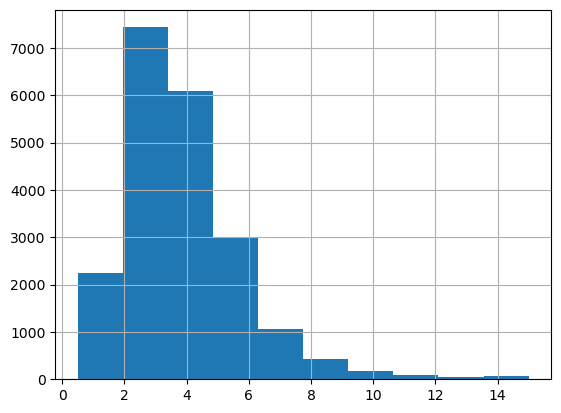

In [34]:
df["MedInc"].hist()

### An Even Better Way? Get Out!!!

![Get Out](../images/get_out.gif)

We can also use another graphing library called Seaborn to create a histogram. Seaborn is a library that is built on top of Matplotlib, which is kind of the basis for graphs in Python, and it has some nice features that make it easier to create some more complex graphs. We'll use Seaborn for most of our visualizations. The seaborn documentation is here: https://seaborn.pydata.org/

For the most part, seaborn is fairly easy to use. For most plots we need to provide the data we want to whichever function draws the plot we desire, possibly with some additional parameters like x/y axis, color, etc... We can normally start with a basic plot of just providing our data, then refine it bit by bit if we need a different look.

<Axes: xlabel='MedInc', ylabel='Count'>

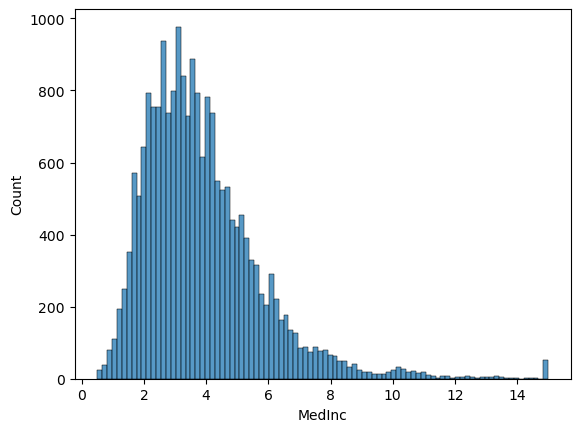

In [35]:
sns.histplot(data=df, x="MedInc")


#### Histograms and Basic Stats

Histograms are very useful for gaining a basic understanding of our data, in several ways:
<ul>
<li> "Shape" of the data, or its distribution. 
<li> Basic Statistics - mean and median can be estimated (they are shown by vertical lines above)
<li> Dispersion - is the data spread out or compacted (measured by varaiance and standard deviation)
<li> Outliers - is anything really big or really small. 
</ul>

Most critically, we can generally see what type of pattern our data follows just by looking at it in a histogram. Our data here fits a common pattern, it is (roughly) normally distributed - meaning that it's distribution is more or less a bell shape, with most records in the middle, and fewer and fewer as we move progressively farther from the mean. 

This visual inspection of our data in a histogram (or a similar visualization) is one of the most common things that we will do with data. 

## Exercise

Try to answer the following questions about the data:
<ol>
<li> Are there any outliers in the AveRooms, AveBedrms, Population, or AveOccup columns? </li>
<li> If so, can you remove them? (This might be more than one step). </li>
<li> Does removing outliers impact the standard deviation (how spread out the data is) for these columns? </li>
<li> What are the mean and median MedInc values after filtering? </li>
<li> Does this indicate anything to you? (It might not). </li>
<li> Create histograms of the finsihed data (or at least a couple, that you modified most). </li>
</ol>


In [36]:
# Start exploring
# Remember, it may be iterative

## Splitting Samples

A very common type of analysis that we want to do is based on looking at two or more subsets in our dataset. For example, we may want to compare the lifetime earnings between people with high school vs college vs university vs graduate degrees. In a medical study we want to see how many vaccinated people get die vs how many unvaccinated people die. Comparisons of groups, and evaluating if there is a significant difference in what we see in the data between the different groups, is very common and important. 

#### Do Older Homes Have Higher Incomes?

We can ask questions to our data, and use some statistics to answer them. For example, we can ask if older homes have people who have more money. Perhaps our suspicion is that people who have family money hold onto homes for a long time, while people with less money scramble to buy newer places that are not as valuable. To answer this, we need to split the data into two groups - older homes and newer homes. We can then compare the groups. For us, I'll use 30 years as the cutoff for "older" and "newer" homes.

In [37]:
df = pd.DataFrame(tmp['data'], columns=tmp.feature_names)
older = df[df["HouseAge"] >= 30]
newer = df[df["HouseAge"] < 30]

print(older.size, newer.size)

79768 85352


In [38]:
df["isOld"] = df["HouseAge"] >= 30

<b>Note that I did two different splits above, either may be useful depending on what we are trying to do. The first made a separate older and newer dataframe for each of the two groups. The second added a variable to allow us to split the data into two groups based on the value of that variable, but keeping the data in one dataframe. </b>

We can now compare the distributions via a histogram. Seaborn commonly uses the 'hue' argument to split the data into groups - each different value in whatever we specify for hue will be a different color in the graph. I also manually specified to use 50 bins, rather than whatever default seaborn picks. 

<Axes: xlabel='MedInc', ylabel='Count'>

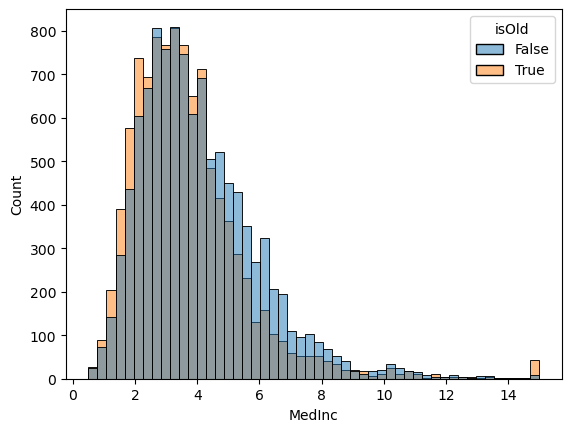

In [39]:
sns.histplot(data=df, x="MedInc", hue=df["isOld"], bins=50)

In [40]:
print(newer["MedInc"].mean() - older["MedInc"].mean())
print(newer["MedInc"].median() - older["MedInc"].median())

0.36327801362069767
0.31510000000000016


#### Detour - Density Plots

We can also use an argument to change the histogram slightly to show the density of the data, rather than the count. Density basically just calculates the percentage of the data that is in each bin, rather than the raw count. This is useful if we have different numbers of records in each group, as it allows us to compare the distributions more easily. These two groups had roughly the same number of records, so the two plots are almost identical - if the difference in the number of records was larger, the density plot would be more useful.

<b>Note:</b> the commented out kdeplot below is basically a smoothed version of this. If you uncomment it and leave the histplot it will overlay the two plots.

New Count: 10669 Old Count: 9971


<Axes: xlabel='MedInc', ylabel='Density'>

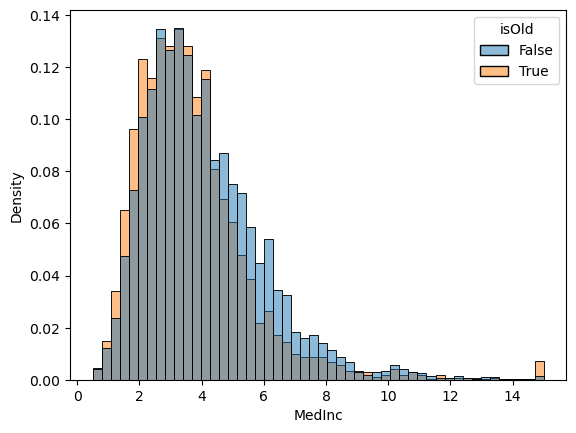

In [41]:

print("New Count:", len(newer), "Old Count:", len(older))
sns.histplot(data=df, x="MedInc", hue=df["isOld"], bins=50, stat="density")
#sns.kdeplot(data=df, x="MedInc", hue=df["isOld"], fill=True)

#### Results

Based on our simple analysis, it looks like older homes have a lower income. We have several pieces of evidence for this:
<ul>
<li> The mean income for older homes is lower than newer homes. </li>
<li> The median income for older homes is lower than newer homes. </li>
<li> <b>The distribution of income for older homes is shifted to the left (lower incomes) than newer homes. We can see this visually with the "hump" on the right side of the bell curve, there are more new properties on that "more valuable than average" side of the distribution.</b></li>
</ul>

## Exercise

Split the data into two groups based on the population of each town. Try things that are over and under 1100 people. Compare the MedInc of the two groups and see if there's evidence to suggest that one group has a higher income than the other.

In [42]:
# split and analyze

### Evaluating Differences in Subgroups

<b> Only worry about this now if you're interested, we'll talk more about the statistics later. </b>

One thing we can see is that different subgroups may have different distributions - this is a common and important thing that we may want to investigate. For example, do people who take a medicince have a longer lifespan than people who take a placebo. Examining this difference and its importance is a big topic, one thing that we can look at now is called the Effect Size - a measure of how substantial the difference between two groups is. 

This is a very useful thing to be able to do - if you are examining the death rate of people who got a treatment vs people who didn't, a statistic like "the non-treated population dies at a rate .087 higher than the treated population" doesn't communicate anything substantial unless we can establish if that difference has substantial meaning.

In [43]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [44]:
CohenEffectSize(newer["MedInc"], older["MedInc"])

0.19209126898654794

#### Effect Size... Sizes

Effect size values can be judged on a scale, the higher the number, the larger the difference. Or in "effect" terms - if we see a big effect size, that is an indication that whatever the differentiator between the two samples is (e.g. often something like one group took a drug, the other took a placebo) significant, or it had an effect. 

There aren't really exact cutoffs for "big" or "small" in effect size, a rough guideline is:
<ul>
<li> < 0.3 - small effect size. 
<li> 0.3 - 0.5 - medium effect size. 
<li> > 0.5 - large effect size
</ul>

Again, these cutoffs are not exact; we will look at determining if there is a significant difference in two samples in more depth in a few weeks. 

We can also visualize the effect sizes via a graph:

![Effect Size](../images/effect_size_chart.jpg)

## Exercise